# Frequent category imputation

In [1]:
import pandas as pd
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [2]:
df.isnull().mean() # pecentage of missing values

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [3]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [12]:
df['BsmtQual'].value_counts().sort_values(ascending=False)

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

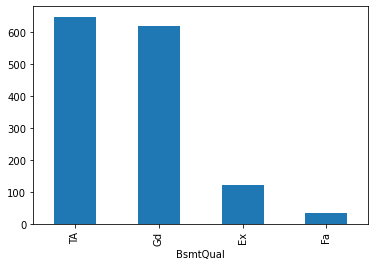

In [4]:
df.groupby('BsmtQual')['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

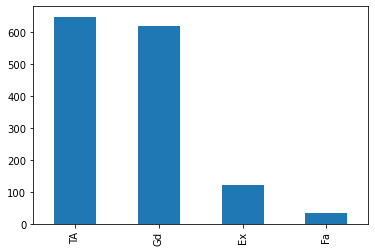

In [5]:
df['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

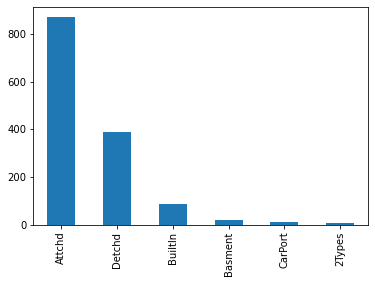

In [6]:
df['GarageType'].value_counts().sort_values(ascending=False).plot.bar()

In [7]:
df['GarageType'].value_counts().sort_values(ascending=False)[0]

870

In [25]:
df['GarageType'].value_counts().sort_values(ascending=False).index[0]

'Attchd'

In [8]:
def replace_nan(df,variable):
    frequent=df[variable].value_counts().sort_values(ascending=False).index[0]
    df[variable].fillna(frequent,inplace=True)

In [9]:
replace_nan(df,'GarageType')
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [29]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    replace_nan(df,feature)

In [30]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [ ]:
### Advantages : Easy to implement,
### Disadvantages : If the NAN count is large, it causes the distortion in the original value

# Adding a variable to capture NAN

In [34]:
import pandas as pd
import numpy as np
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [35]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0) # capturing importance of NAN values with new feature
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [38]:
def replace_nan(df,variable):
    frequent=df[variable].value_counts().sort_values(ascending=False).index[0]
    df[variable].fillna(frequent,inplace=True)

In [40]:
replace_nan(df,'BsmtQual') # replace with frequent variable
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [41]:
df['BsmtQual'].isnull().sum()

0

In [42]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].value_counts().sort_values(ascending=False).index[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [43]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


# Suppose if we have more frequent categories, we just replace NAN with a new category

In [44]:
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [45]:
def replace_nan(df,variable):
    df[variable+'_new']=np.where(df[variable].isnull(),'Missing',df[variable])

In [46]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    replace_nan(df,feature)

In [48]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Missing,Attchd
6,Ex,Gd,Attchd,307000,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,Gd,TA,Attchd
8,TA,TA,Detchd,129900,TA,TA,Detchd
9,TA,TA,Attchd,118000,TA,TA,Attchd


In [50]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [51]:
df.head()

,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# Handle Categorical Features

# One Hot encoding

In [52]:
import pandas as pd

In [54]:
df=pd.read_csv('titanic.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [58]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [59]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [60]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [62]:
df.dropna(inplace=True)

In [63]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [64]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [66]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
